In [1]:
%load_ext autoreload

In [67]:
import pandas as pd
import numpy as np
import UserDefinedFunctions
import time
import matplotlib.pyplot as plt

%matplotlib inline

## 5. Strategy Performance

In this final notebook we'll leverage the code we wrote previously to predict the forward market return, form a trading position off this expectation, generate the return of the strategy, and then look at ways of analyzing the performance. 

Previously we followed Hull et al. and showed that we can generate amodel with relatively good predictive power as measured by R^2 (or maybe we didn't?). Now we have to see if that predictive power actually means anything. We could imagine a scenario where a model makes accurate predictions 99 out of 100 times, each time earing a dollar. That's pretty good. But if the one time it makes an inaccurate prediction it loses `$`100 dollars than the overall strategy can be a loser. 

Hopefully we'll be a bit more successful here.


<div class="alert alert-info" role="alert">
<span class="label label-primary"> The Paper </span>
<br><br>

3. A One-Month Market-Timing Strategy 

3.1 Trading Strategy Construction 

Now that we have established good statistical forecasts of next-month excess market returns, we can translate these statistical results into a trading strategy.  We determine the amount invested in the market by transforming the raw equity premium forecasts.  When the equity risk premium forecast for the next month is zero, we want to be 0% invested in the market and 100% in T-bills.  We also want to be 100% invested when the equity premium forecast is at its historical average.  We want to transform our raw equity premium forecasts into how much to invest in the market while satisfying these conditions.   
There are different ways we can make such a transformation.  We use a simple method that takes into account our confidence in the model.  Each month when we estimate the model, we get a value for the root mean square error (RMSE) for the fit.  A low RMSE indicates the model fits well, and a high RMSE indicates a model which leaves much variation in the data unexplained.  Intuitively, when the RMSE is high and the model fits poorly, we are less confident about our forecasts and would like to scale back our position.  When the RMSE is low and the model fits the data well, our forecasts are likely to be more precise with lower forecast errors.  We want to scale up the resulting position.   
<br><br>

In line with the arguments above, we scale our equity premium forecasts by the inverse of the RMSE and multiply it by five to satisfy the above conditions.  In particular, when the equity premium forecast is at its historical mean, scaling by the RMSE and multiplying by five results in a position close to 100%.  When the equity premium forecast is zero, we are 0% invested.  We restrict our position to be between 0% and 150% invested in the S&P 500.  Even if our equity premium forecast were negative, we set our position to be 0% rather than take a short position.
<br><br>

To understand the impact of this transformation on our results, we consider two alternative transformations.  First, we simply multiply our forecasts by 100.  Second, we divide our forecasts by a four-year moving average of the predicted returns.  Both transformations lead to similar results to those of the RMSE transformation.   
<br><br>

Trading daily may be inefficient because day-to-day adjustment to the position may be small.  As an alternative, we consider trading only once a month at the end of the month.  Perhaps not surprisingly, this strategy with monthly rebalancing does not perform as well as the strategy that rebalances daily.  We have included variables at different frequencies which may also be released at different times of the month.  By restricting position adjustment to be only at the end of the month, we do not capture the intra-month changes in some predictor variables which may provide valuable information.   
<br><br>

3.2 Strategy Performance 

Figure 2 presents the cumulative wealth of `$`1 invested in the market-timing strategy versus invested in the S&P 500.  In our sample from 2003 to February of 2017, the market grew from `$`1 to just over `$`3, whereas the market-timing strategy would have grown `$`11 to over `$`18 in the same period.  An important difference between the two cumulative wealth paths is that during the Global Financial Crisis (GFC), the market-timing strategy did not experience a large drawdown whereas the S&P 500 had a drawdown of over 50`%`.  The largest drawdowns of the market-timing strategy occurred in 2010 and 2015.   
<br><br>

<a id='snap_back_2'></a>
<a href='#supplemental_content_2'>(Supplemental Content Available)</a>
<br><br>

Figure 3 shows the positions taken by our market-timing model.  The market exposure is constrained to be between 0`%` and 150`%` (1.5 times levered).  There is large variation in the dayto-day positions.  In the first four years the position changes were particularly large compared to those in later years.  From 2012 to 2015, there is an extended period in which the model called for positive positions of 50`%` or greater.  This aggressive positioning coincides with a period in which market excess returns were large and positive.  From Figure 2, we can see the cumulative wealth of the market-timing strategy almost doubled in this period.  
<br><br>


<div class="alert alert-info" role="alert">
![](strategy_performance_1.png "Title")

<div class="alert alert-info" role="alert">


Some market-timing models, including the one put forward by Hull and Qiao (2017), tend to be able to avoid large market-wide drawdown and perform especially well when the aggregate market returns are poor.  However, in market booms, Hull and Qiao’s (2017) model is not fully exposed to the upside gains.  In comparison, our one-month market-timing model is able to outperform buy-and-hold returns both in bear and bull markets.  In Figure 4, we see that the oneyear rolling relative performance to the market is the largest during the Global Financial Crisis, but the relative performance is still positive during the stock market recovery after the GFC.  Significant upside capture is one desirable feature of our model that is absent in Hull and Qiao’s (2017).   
<br><br>
 

<div class="alert alert-info" role="alert">
![](strategy_performance_2.png "Title")

<div class="alert alert-info" role="alert">
![](strategy_performance_3.png "Title")

<div class="alert alert-info" role="alert">

One important measure of risk, especially for practitioners, is the maximum drawdown experienced by a strategy.  A drawdown is calculated as the percent change from a strategy’s peak to its next closest trough; maximum drawdown is the largest drawdown in the lifetime of the strategy.  Maximum drawdown complements volatility to give investors a more complete picture of the stability of the strategy.  Figure 5 compares the drawdowns of our market-timing strategy with those of the S&P 500.  There are several differences between the two series.   
<br><br>

<a id='snap_back_1'></a>
<a href='#supplemental_content_1'> (Supplemental Content Available)</a>
<br><br>

First, the magnitudes of the maximum drawdowns are vastly different between buy-and-hold and our market-timing model.  For the S&P 500 buy-and-hold, the maximum drawdown exceeds 50`%` during the Global Financial Crisis.  In comparison, the largest drawdown experienced by the market-timing model in this sample is about 20`%`, less than half of the drawdown for the S&P 500.   
<br><br>


<div class="alert alert-info" role="alert">
![](strategy_performance_4.png "Title")

<div class="alert alert-info" role="alert">

Second, drawdowns of the market-timing model and those for buy-and-hold do not appear to be strongly correlated.  When the S&P 500 had a large drawdown in 2008 and 2009, the markettiming model did not have significant drawdowns in that same period.  In fact, during the largest S&P drawdown, the market-timing model had modest drawdowns of less than 1`0`% which only lasted a few months.  When the market-timing model had its largest drawdowns of 20`%` in 2010 and 2015, the S&P 500 did also experience some drawdowns of similar magnitudes, but these are mild episodes compared to the maximum drawdown during the Global Financial Crisis.   
<br><br>

Third, the two strategies in Figure 5 appear to experience drawdowns at different frequencies.  For the S&P 500, there were several large drawdowns on the order of 25-55`%` which lasted several months or longer each time.  In comparison, our market-timing model experienced more frequent drawdowns of about 5-10%, but these rarely lasted for more than a few months.  Most of these relatively small drawdowns reversed after just a few weeks. 
<br><br>

The two biggest drawdowns for our market-timing strategy occurred in 2010 and 2015.  In the summer of 2010 and 2011, our model prescribed 150% long position when the S&P 500 recorded negative returns, and the strategy was close to 0% invested during the market rebounds.  The Baltic Dry Index and NAPM were the main drivers for this drawdown.  In August 2015, the strategy was levered and was over 100% invested when the market performed poorly.  LOAN and NAPM were the main contributing variables for the model signal that month.   
<br><br>

While the one-month market-timing model we have put forward is interesting on its own, it becomes more powerful when combined with other models.  Investors dislike high volatility and large drawdowns, and value the ability to improve along those dimensions.  In the next section, we explore combining the one-month model with another market-timing model.  
<br><br>
 

<span class="label label-warning"> Assessment Question: Remember </span>

Which of the following are true?

 * Hull et al. invest more into the market when the model has high predictive power based on a low R^2
 * Hull et al. allow the use of leverage to invest more than 100`%`
 * Hull et al. allow shorting to invest less than 0`%`
 * Drawdown is the maximum one-month calendar loss of a trading strategy
 * The S&P had a large drawdown in 2008 and 2009 during the Global Financial Crisis
 * A high drawdown corresponds to higher RMSE in the S&P 500

<span class="label label-warning"> Assessment Question: Understand </span>

" A drawdown is calculated as the percent change from a strategy’s peak to its next closest trough."

Do you understand the concept of drawdown? Which of these would be an accurate description for calculating drawdown?

 * Calculate the 1M, 2M, 3M, ... 12M forward return relative to every date. The drawdown is the minimum of these values. 
 * Calculate the trailing 1M return relative to every date. Multiply by 12 in order to annualize the figure. The drawdown is the minimum of these values. 
 * For every date, calculate the t-day forward return for every possible value of t. The drawdown is the minimum of these values. 
 * Calculate the maximum and minimum price over the entire history. The drawdown is the maximum minus the minimum values. 
 * None of the above.

<span class="label label-warning"> Assessment Question: Apply </span>

Based on Hull et al., write a function that takes the RMSE of a regression and calculates the trade position (0-150%). Hull et al. gave three examples of how to do this. Pick the one you want to use (or be moderately ambitious and write a function that will do all three).

Note: this exercise could potentially be tricky! Your model may have different RMSE distributions and prediction distributions than Hull et al. by virtue of different explanatory variables, different weighting schedules, different lookback periods, etc. This may result in the given leverage scheme not being well calibrated to your model. 

Furthermore, Hull et al. mention that they constructed their methodology such that when you use it they are 100% invested when the equity market premium is at its historical average. But what historical average are they using? Is it a single value or is it continuously recalculated over time? Should you contaminate the historical average by using future data? What should you do if over time the historical average changes such that (inverse RMSE * 5) no longer equals the historic average? And is the RMSE a straight average of each observation's error in the training data or is it a weighted average (since we use WLS)? These may possibly be hard questions... or they may be trivial and not really matter much. Just something to think about...

In [ ]:
# TO DO






1. try the 'standard' position weighting strategy:



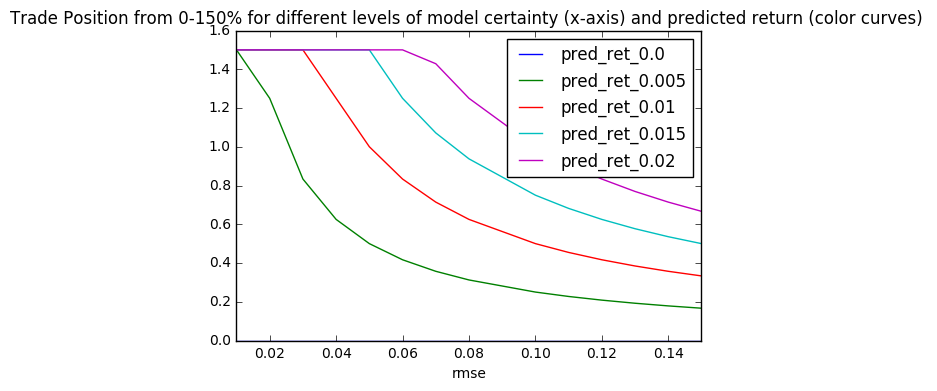

In [39]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


def calc_trade_position(prediction, rmse, mode):
    '''
    :param rmse: the root means square error, as double
    :param mode: 
    :return leverage, as float
    '''
    
    assert mode in ['standard', 'times_100'], 'error: invalid mode'
    
    # note: floor/ceiling all positions at 0 and 1.5
    
    # 1. inverse of the RMSE and multiply it by five
    # "we scale our equity premium forecasts by the inverse of the RMSE and multiply it by five"
    if mode == 'standard':
        inverse = 1. / rmse
        return min(1.50, max(prediction * inverse * 5.0, 0.))
        
    
    # 2. simply multiply rmse by 100
    if mode == 'times_100':
        return min(1.50, max(rmse * 100, 0.))
    
    # 3. "divide our forecasts by a four-year moving average of the predicted returns"
    # this actually does not depend on the rmse and instead uses the actual predicted S&P 500 return
    # therefore can't be done in this function
    
print("1. try the 'standard' position weighting strategy:")
curve = {}
for predicted_spy_return in  [0.0, 0.005, 0.01, 0.015, .02]:
    curve[predicted_spy_return] = []
    for rmse in [.01, .02, .03, .04 ,.05, .06, .07, .08, .10, .11, .12, .13, .14, .15]:
        curve[predicted_spy_return].append( calc_trade_position(predicted_spy_return, rmse, mode = 'standard'))
        #print('--{} RMSE = {} leverage'.format(rmse, calc_trade_position(predicted_spy_return, rmse, mode = 'standard')))
    
print()

chart = pd.DataFrame()
chart['rmse'] =  [.01, .02, .03, .04 ,.05, .06, .07, .08, .10, .11, .12, .13, .14, .15]
for predicted_spy_return in [0.0, 0.005, 0.01, 0.015, .02]:
    chart['pred_ret_{}'.format(predicted_spy_return)] = curve[predicted_spy_return]


chart.set_index('rmse').plot(title = 'Trade Position from 0-150% for different levels of model certainty (x-axis) and predicted return (color curves) ')

# we can observe that our position (how much we invest in the market) is proportional to 
# how much we expect the market to go up and also to our level of certainty

# as uncertainty increases (moving right along x-axis), the amount invested declines (curves go down)
# separately, as the expected return of the market goes up (the pink line represents a 2% expected gain), the amount invested
# goes up (the pink line is 'above' all the other curves)


In [ ]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# the above shows how we map from an RMSE to a position weight (0-150%)
# but what is the typical range of RMSE for the model we are working with?
# let's see below:

training_data = pd.read_hdf('training_data.hdf')

# let's get the 'in-sample' r^2 everytime we estimate the model parameters
# this is the R^2 that is based on the difference between actual and predicted S&P 500 monthly returns

# for my data, the 85th row corresponds to December 2003 and the 254th row corresponds to December 2017
# iterate from 85 to 254 to cover each expanding window
dates_results = []
rmse_results = []
for i in range(85, 254):
    
    # estimate the model on the trailing data
    results = UserDefinedFunctions.WLS_regression(training_data.iloc[0:i], rho = 0.99)
    
    # collect the date and r^2 to use later in a chart
    dates_results.append(results['portfolio_date'])
    rmse_results.append(results['mse'] ** 0.5)
    
# let's make a dataframe and chart the results
df = pd.DataFrame({'portfolio_date': dates_results,
                  'rmse': rmse_results})
df.sort_values(by = 'portfolio_date', inplace = True)
df.set_index('portfolio_date').plot(title = 'In-sample RMSE over time')
    

<span class="label label-warning"> Assessment Question: Apply </span>
    
Now it's finally time to combine everything we did before. Ultimately we want to calculate the amount you'd have over time if you had invested `$`1 in your strategy versus `$`1 in the S&P 500.  

This will build on all your decisions in prior notebooks. Recall this is our broad strategy: For each date, we define a training data set that is weighted more towards recent observations than older observations. We use stepwise variable selection then to identify which variables to use in a regression. We then apply a regression to get model coefficients. We apply those coefficients to the current data (which was held out-of-sample from the training data set) to get the forward 1M predicted S&P 500 return. We then combine the prediction with the measure of the model's certainty in order to produce a trading position between 0 and 150%. We then calculate the 1M return of that prediction and record it. Then we move on to the next date. 

Do it!

In [ ]:
# TODO





In [59]:
# TODO

#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

all_possible_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium', 'slope_interest_rate',
         'housing_starts', 'delinquencies', 'change_unemployment']
rho = 0.99
verbose = False

# get the training data
training_data = pd.read_hdf('training_data.hdf')

# record the strategy results
strategy_results = pd.DataFrame()

#iterate through each date we want to make a prediction
counter = 0
start = time.time()
for date in pd.date_range('2002-12-31', '2018-04-30', freq = 'M'):
    
    if counter % 12 == 0:
        print(date)
        counter += 1
    
    if verbose:
        print('trade summary for {}'.format(date))
    
    # 1. estimate a model
    # get the training data
    # get the data from the start through the month prior to the date we want to make a prediction
    # so if we want to put on a trade on 12/31/2005, let's use a dataset through 11/30/2005 to develop the model
    # (no peeking into the future!)
    sample_dataset = training_data[training_data['portfolio_date'] < date]
    if verbose:
        print('--training data runs from {} to {}'.format(sample_dataset['portfolio_date'].min(), sample_dataset['portfolio_date'].max()))
    
    # estimate the model (incorporating WLS and stepwise variable selection)
    result = UserDefinedFunctions.WLS_regression_with_var_selection_r2(data = sample_dataset,
                                         all_possible_vars = all_possible_vars,
                                         rho = rho,
                                         verbose = False)
    
    # see model estimation results
    if verbose:
        print('--selected variables to use: {}'.format(result['model_vars']))
        print('--in-sample model RMSE: {}'.format(result['mse'] ** 0.5))
        print('--in-sample model adjusted R^2: {}'.format(result['r_squared_adjusted']))
        print()
    
    # 2. make a prediction
    # apply the model to the 'current date' (out-of-sample)
    prediction_dataset = training_data[training_data['portfolio_date'] == date].copy()
    
    # add a constant (a constant was used in the regression)
    prediction_dataset['const'] = 1
    assert prediction_dataset.shape[0] == 1, 'error: unexpected number of rows in prediction dataset'
    if verbose:
        print('--apply model to data on {}'.format(prediction_dataset['portfolio_date'].max()))
    
    prediction = 0
    for var in result['model_vars']:
        prediction += prediction_dataset[var].iloc[0] * result[var]
    if verbose:
      
        print('--the predicted 1M forward S&P 500 return is {}'.format(prediction))
        print('--the difference is {}'.format(prediction - prediction_dataset['forward_spy_return'].iloc[0]))
        print()
        
    
    # 3. put on a trade based on your prediction
    trade_position = calc_trade_position(prediction, result['mse'] ** 0.5, 'standard')
    if verbose:
        print('--we want to be {} invested'.format(trade_position))
        print()
    
    # 4. measure the trade performance (combination of position and actual return of the sp500)
    sp500_return = prediction_dataset['forward_spy_return'].iloc[0]
    strategy_return = trade_position * sp500_return
    if verbose:
        print('--the actual 1M forward S&P 500 return is {}'.format(sp500_return))
        print('--we made {}%'.format(strategy_return))
        print('--relative to the S&P 500 we made {}'.format(strategy_return - sp500_return))
        print()

    # 5. record the results
    strategy = pd.DataFrame({'trade_date': [date],
                             'predicted_return': [prediction],
                             'certainty': [result['mse'] ** 0.5],
                            'trade_position': [trade_position],
                             'strategy_return': [strategy_return],
                            'spy_return': [sp500_return],
                            'relative_return': [strategy_return - sp500_return]})
    strategy_results = strategy_results.append(strategy)
    
print('all done in {}m'.format((time.time() - start) / 60))
    
strategy_results.head()


2002-12-31 00:00:00
all done in 0.3299354116121928m


,certainty,predicted_return,relative_return,spy_return,strategy_return,trade_date,trade_position
0,0.047456,-0.022661,0.024595,-0.024595,-0.000000,2002-12-31,0.00000
0,0.046899,-0.000425,0.013479,-0.013479,-0.000000,2003-01-31,0.00000
0,0.046287,0.021578,-0.000942,-0.001885,-0.002827,2003-02-28,1.50000
0,0.045670,-0.008216,-0.084612,0.084612,0.000000,2003-03-31,0.00000
0,0.046396,0.000509,-0.051827,0.054836,0.003009,2003-04-30,0.05488


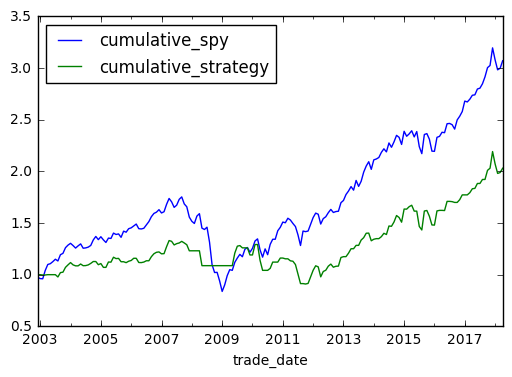

In [63]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


# now calculate the cumulative returns of the strategy since inception for every month
# so if in month1 you earn 1% and in month 2 you earn 1.2%, the cumulative return over those two periods is
# 1.01 x 1.012
# and then if in month3 you earn -1%, the cumulative return over three periods is
# 1.01 x 1.012 X 0.99

# use the cumulative product function to calculate returns:
strategy_results['temp'] = strategy_results['strategy_return'] + 1.0
strategy_results['cumulative_strategy'] = strategy_results['temp'].cumprod()

strategy_results['temp'] = strategy_results['spy_return'] + 1.0
strategy_results['cumulative_spy'] = strategy_results['temp'].cumprod()

strategy_results.set_index('trade_date')[['cumulative_spy', 'cumulative_strategy']].plot()



<span class="label label-warning"> Assessment Question: Analyze </span>

 * How does your strategy do compared to the S&P 500 in terms of cumulative return? Did you outperform the simple buy-and-hold strategy? 
 * What was your trading position over time? How often were you underinvested vs overinvested in the market (<100% position versus >100% position)?
 * How certain was the model over time?

In [ ]:
# TODO




the cumulative return of the S&P 500 was 307.08375018416365%
the cumulative return of the strategy was 203.0553929286448%

the strategy is 'overinvested' 0.4594594594594595% of the time
the strategy is 'underinvested' 0.5405405405405406% of the time


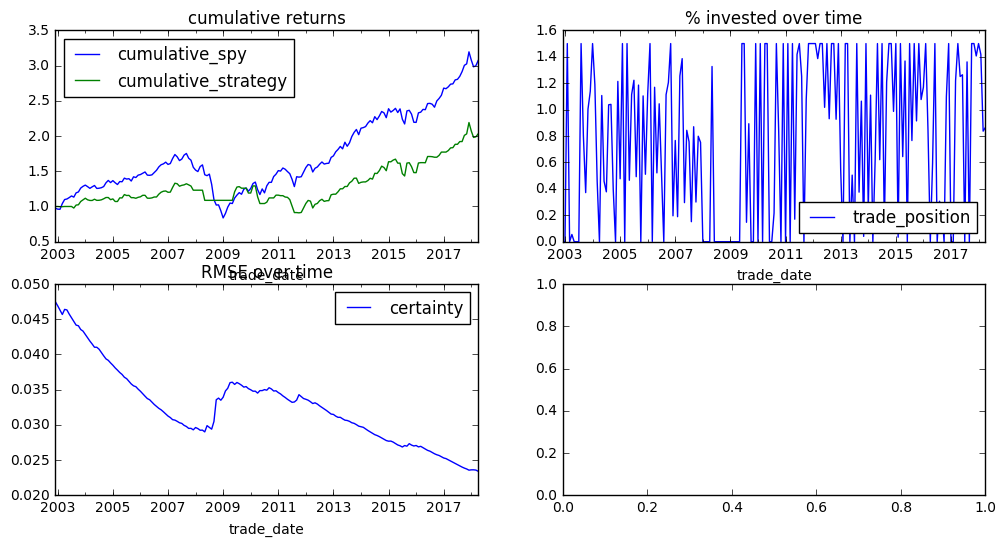

In [81]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


f, axes = plt.subplots(2,2, figsize = (12,6))
strategy_results.set_index('trade_date')[['cumulative_spy', 'cumulative_strategy']].plot(title = 'cumulative returns', ax = axes[0,0])
strategy_results.set_index('trade_date')[['trade_position']].plot(title = '% invested over time', ax = axes[0,1])
strategy_results.set_index('trade_date')[['certainty']].plot(title = 'RMSE over time', ax = axes[1,0])

print('the cumulative return of the S&P 500 was {}%'.format(strategy_results['cumulative_spy'].iloc[-1] * 100))
print('the cumulative return of the strategy was {}%'.format(strategy_results['cumulative_strategy'].iloc[-1] * 100))
print()
print("the strategy is 'overinvested' {}% of the time".format((strategy_results['trade_position'] > 1.0).mean() ))
print("the strategy is 'underinvested' {}% of the time".format((strategy_results['trade_position'] < 1.0).mean() ))


<span class="label label-warning"> Assessment Question: Evaluate </span>
    
    
Based on your results above, did your strategy do well? Describe its performance. 
    

[ your answer here]



Based on the results above the model is poorly when compared to a buy-and-hold strategy. The total cumulative return was less than the S&P 500. Investing `$`1 in the S&P500 would yielded a portfolio value of `$`3.07 over the nearly 15 year period. In contrast, the given model would have only producted a portfolio worth `$`2.03. 

The model tended to be very certain during the financial crisis when the RMSE reached down to almost .03. This resulted in taking zero exposure to the market due to the combination of the certainty and the predicted negative returns. Consequentially, the strategy sidestepped the steepest market losses during the Financial Crisis. 

<span class="label label-warning"> Assessment Question: Apply </span>
    
The simplest and most straight forward method to evaluate a strategy is just to see how much money you made (or lost) but there are many more. Let's consider a few. For example, Hull et al. also discussed drawdown as a performance metric which they defined as "the percent change from a strategy’s peak to its next closest trough."

An alternative definition of drawdown is just the most that a strategy has lost over some fixed time period. For instance, consider every calendar month and find the month where the strategy did its worst. Instead of monthly time periods, one could consider quarterly time periods as well. The monthly and quarterly time periods make sense because investors will often review their portfolios every month or quarter and decide whether they need to make a change to their investment portfolio (ie divest from a strategy that is performing poorly). 

If you are an investor trying to evaluate a strategy, which definition do you like? Pick one and implement it to analyze your strategy and the benchmark S&P 500. 


In [ ]:
# TODO




In [86]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# maximum monthly loss approach
print('drawdown by monthly return:')
print("the worst month's performance for the strategy was: ", strategy_results['strategy_return'].min())
print("the worst month's performance for the S&P 500 was: ", strategy_results['spy_return'].min())


drawdown by monthly return:
the worst month's performance for the strategy was:  -0.119181825927
the worst month's performance for the S&P 500 was:  -0.165186622384


<span class="label label-warning"> Assessment Question: Evaluate </span>
    
    
Based on your results above, did your strategy do well? Describe its performance. 
    

[your answer here]




The model strategy did well on this measure in comparison to the S&P500. The maximum monthly loss was 11.9% compared to the S&P 500's maximum 16.5% loss. 

Beacuse investors are loss averse, they would experience less "pain" from the strategy. As we saw before though, while the strategy produces less "pain" it also produces less overall "gain". 

<span class="label label-warning"> Assessment Question: Apply </span>
    
We discussed above the concept of the maximum level of loss your strategy would produce. Another way of evaluating a strategy is to consider the <i>frequency</i> of loss. 
    
One way to do this is to calculate the propotion of time periods (daily, monthly, etc) that the strategy produced a positive return vs the proportion that the strategy produced a negative return. 

Another option is to calculation the proportion of time that a strategy beats its benchmark (so relative to another strategy rather than just simply looking at whether it was greater or less than zero). 

Pick one way of measuring the frequency of loss and implement it. 

In [ ]:
# TODO



In [90]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# calculate loss frequency relative to the benchmark S&P500
ratio = (strategy_results['strategy_return'] >= strategy_results['spy_return']).mean()
print('the strategy outpeformed the S&P500 in {}% of the months'.format(ratio * 100))

the strategy outpeformed the S&P500 in 49.18918918918919% of the months


<div class="alert alert-warning" role="alert">
[your answer here]





The strategy did poorly by this measure. It outperformed the benchmark less than half the time (49%). So while the strategy did a good job of avoiding the biggest losses (drawdown), it did not do well very frequently. This likely is a contributing factor to the overall lower cumulative return posted  by the strategy. 

<span class="label label-warning"> Assessment Question: Evaluate </span>
    
    
We're close to the end of our project. Let's reflect on the results:

Did your results match the results of the paper? If it did not, what are some possible explanations? Do you think the paper's results are credible? 



<div class="alert alert-warning" role="alert">
[your answer here]





I wasn't able to replicate the paper's results. My strategy neither matched the cumulative level of returns of their strategy nor did it even beat the S&P 500 benchmark. An obvious explanation for the discrepency is that I did not download all the variables that they did. They used 15 explanatory variables in their model versus only 7 for mine. Furthermore, I am not certain that my stepwise variable selection procedure was working properly. Because of that I implemented a different version that was not bi-driectional and that used adjusted R^2 as the evaluation metric rather than the AIC ratio. I did a good job of preventing data leakage (data from the future) which is something that Hull et al. did not discuss so we do not know if they did that as well. Their results may therefore be contaminated by future data and might explain why their strategy did so well but my strategy did not. 

<span class="label label-warning"> Assessment Question: Evaluate </span>
    
    
Having gone through the process of replicating Hull et al.'s strategy, do you like it? Would you invest your money in it? Would you want to develop your own model further and invest in that?

(... if you do like their model you actually can invest in it through an ETF (ticker is HTUS): https://hulltacticalfunds.com/)

<div class="alert alert-warning" role="alert">
[your answer here]






I do like their model! I may not invest in it though because I'm happy being boring and just earning the index return. I would like to continue further research based on their framework. First off would be getting all the explanatory variables they used plus possibly some more that I think could be important.

<span class="label label-warning"> Assessment Question: Create </span>
    
How would you improve on your model? Or improve on their model? Or what would you like to try that's different?

<div class="alert alert-warning" role="alert">
[your answer here]


In future testing I would build in the capability of trying different models other than linear regression. Given how machine learning is very much in vogue right now, I think we could replace the WLS part of this research pipeline with a random forest or neural network. Or use ML to generate features that could be used in a regression model. 



<span class="label label-success"> Commentary and Supplemental Content </span>

So that's the end!

In this project we have replicated to the best of our ability the methodology in a published paper. In a sense, this was an easy task. The methodology was laid out before us and we just had to try to replicate it. The given path is known to lead to a successful journey (or at least that's what the authors claim) so if we just stick to the path they laid out for us then success is assumed to be the result. 

But in reality, the research process is about finding new insights and investment opportunities that no one else knows about. There are millions of ideas to explore... and it'll take a lot of time to explore them. Using a jupyter notebook to test a single idea is great. It makes it easy to follow the process and interpret the results at each step. But it's not the most efficient way to test a million ideas. 

As computer scientists that are comfortable with code it should be obvious to us that a systematic research process is needed, one that can operate on an industrial scale. Instead of predicting the S&P 500 we could have tried to predict any one of a thousand financial instruments. And we could have used thousands of different explanatory variables. And we would want to test how different securities behave across different geographic regions and different time periods. And we'd want to be able to run thousands of tests automatically whenever we develop a new idea and then deliver the results in the most productive format. 

Institutional investors (professional investors that work as a team) systematize this research process. Team members specialize in different parts of the research pipeline and managers organize and coordinate the overall picture. A single person did not design and build a 747 airplane and it's the same with building a sophisticated investment vehicle that must constantly adapt to changing markets. 

As programmers and computer scientists, we probably have a bit of a leg-up in this regard. If you choose to continue in financial research, I'd encourage you to think as much about the research process as the research content itself and think about ways to better organize your reseach efforts. 

### End Lesson



[intentionally left blank]
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>


<a id='supplemental_content_1'></a>
<span class="label label-success"> Commentary and Supplemental Content </span>


## Other metrics to evaluate an investment strategy...

There are dozens more performance metrics you could possibly calculate, and each would have its own speficic utility in telling you something about your strategy. For example, in the ML4T course, you've covered the Sharpe Ratio. Here are a few more:

Alpha and Beta: How much your returns are due to the overall market and how much is due to the genius of your strategy itself

http://www.arborinvestmentplanner.com/alpha-and-beta-investment-risk/

Information Ratio: Similar to Sharpe Ratio. A risk adjusted return where you compare your portfolio's return versus some benchmark 

https://en.wikipedia.org/wiki/Information_ratio

Many other "risk ratios" which try to adjust your returns for some concept of risk

https://www.investopedia.com/articles/stocks/11/5-ways-to-measure-money-managers.asp

Value-at-Risk: How much you might lose from your strategy on a given day

https://en.wikipedia.org/wiki/Value_at_risk


And here's an overview of many metrics:

https://personal.vanguard.com/pdf/flgerm.pdf

http://evolutiq.com/wp-content/uploads/2015/09/EVOLUTIQ-White-Paper-Publication-2nd-Issue-Common-Metrics-for-Performance-Evaluation.pdf

<a href='#snap_back_1'>go back to main body</a>

<a id='supplemental_content_2'></a>
<span class="label label-success"> Commentary and Supplemental Content </span>

## Thoughts on measuring strategy performance...

Hull et al. have discussed several characteristics of their strategy's returns including how much it earned over the full period analyzed and how much it lost during select subperiods. Are those the only things we should be concerned about when evaluating a strategy?

Here's a recent (July 2018) article in the New York Times where they talk about whether some professional investors can beat the market:

https://nyti.ms/2NIKtma


For the most part the article is asking the question "Did hedge funds beat the S&P 500?" Implicitly the article is stating that the return of a strategy (or relative return versus some benchmark) is the most important thing to look at. And for most investors that probably is the most important part: How much did my stock portfolio make and is it enough for me to retire? 

But for professional investors that may not be the most important part. Low returns can be transformed into high returns just through leverage. If you have a strategy that returns 8% a year consistently, then through 2x leverage you can now have a strategy that returns 16% a year consistently. That sounds like magic but there's a a downside. If your strategy dips and loses 8% then you actually lose 16%. 

Here's an example of a strategy that professional investors like: A trade that generates small positive returns that are super stable (close to zero chance that the trade perform differently than predicted). From this perspective, the volatility (standard deviation of returns) is one of the most important things to look at. 


<a href='#snap_back_2'>go back to main body</a>

